In [0]:
dbutils.fs.ls("/FileStore/tables")

Out[59]: [FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1645611607000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019.csv', name='clinicaltrial_2019.csv', size=42400056, modificationTime=1648770496000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019_csv-1.gz', name='clinicaltrial_2019_csv-1.gz', size=10060669, modificationTime=1652134712000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019_csv-2.gz', name='clinicaltrial_2019_csv-2.gz', size=10060669, modificationTime=1652135056000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019_csv-3.gz', name='clinicaltrial_2019_csv-3.gz', size=10060669, modificationTime=1652135235000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019_csv-4.gz', name='clinicaltrial_2019_csv-4.gz', size=10060669, modificationTime=1652135388000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019_csv-5.gz', name='clinicaltrial_2019_csv-5.gz', size=1006

In [0]:
dfmesh=sc.textFile("/FileStore/tables/mesh.csv")
dfclinical=sc.textFile("/FileStore/tables/clinicaltrial_2021.csv")
dfpharma=sc.textFile("/FileStore/tables/pharma.csv")

In [0]:
##TASK_1

In [0]:
header = dfclinical.first()
dfheader = dfclinical.filter(lambda line: line != header)
dfheader.count()

Out[62]: 387261

In [0]:
##Task_2

In [0]:
#taking the file without header to find the frequency
splitRDD=dfheader.map(lambda x: x.split("|"))
splitRDD.take(4)

Out[64]: [['NCT02758028',
  'The University of Hong Kong',
  'Recruiting',
  'Aug 2005',
  'Nov 2021',
  'Interventional',
  'Apr 2016',
  '',
  ''],
 ['NCT02751957',
  'Duke University',
  'Completed',
  'Jul 2016',
  'Jul 2020',
  'Interventional',
  'Apr 2016',
  'Autistic Disorder,Autism Spectrum Disorder',
  ''],
 ['NCT02758483',
  'Universidade Federal do Rio de Janeiro',
  'Completed',
  'Mar 2017',
  'Jan 2018',
  'Interventional',
  'Apr 2016',
  'Diabetes Mellitus',
  ''],
 ['NCT02759848',
  'Istanbul Medeniyet University',
  'Completed',
  'Jan 2012',
  'Dec 2014',
  'Observational',
  'May 2016',
  'Tuberculosis,Lung Diseases,Pulmonary Disease',
  '']]

In [0]:
#taking the 6th column type
extractedRDD= splitRDD.map(lambda x: [x[5],1])
extractedRDD.take(4)

Out[65]: [['Interventional', 1],
 ['Interventional', 1],
 ['Interventional', 1],
 ['Observational', 1]]

In [0]:
extractedrdd1= extractedRDD.reduceByKey(lambda x,y:x+y)
extractedrdd1.take(4)

Out[66]: [('Observational', 77540),
 ('Observational [Patient Registry]', 8180),
 ('Interventional', 301472),
 ('Expanded Access', 69)]

In [0]:
frequency=extractedrdd1.map(lambda x:(x[1],x[0])).sortByKey(ascending=False)
orderfrequency=frequency.map(lambda x:(x[1],x[0]))
orderfrequency.collect()

Out[67]: [('Interventional', 301472),
 ('Observational', 77540),
 ('Observational [Patient Registry]', 8180),
 ('Expanded Access', 69)]

In [0]:
#Task_3

In [0]:
#taking the file without removing the header of clinical trial
splitrdd= dfclinical.map(lambda x: x.split("|"))
splitrdd.take(4)

Out[69]: [['Id',
  'Sponsor',
  'Status',
  'Start',
  'Completion',
  'Type',
  'Submission',
  'Conditions',
  'Interventions'],
 ['NCT02758028',
  'The University of Hong Kong',
  'Recruiting',
  'Aug 2005',
  'Nov 2021',
  'Interventional',
  'Apr 2016',
  '',
  ''],
 ['NCT02751957',
  'Duke University',
  'Completed',
  'Jul 2016',
  'Jul 2020',
  'Interventional',
  'Apr 2016',
  'Autistic Disorder,Autism Spectrum Disorder',
  ''],
 ['NCT02758483',
  'Universidade Federal do Rio de Janeiro',
  'Completed',
  'Mar 2017',
  'Jan 2018',
  'Interventional',
  'Apr 2016',
  'Diabetes Mellitus',
  '']]

In [0]:
#taking the 8th column conditions
splitrdd1= splitrdd.map(lambda x: x[7])
splitrdd1.take(4)

Out[70]: ['Conditions',
 '',
 'Autistic Disorder,Autism Spectrum Disorder',
 'Diabetes Mellitus']

In [0]:
splitrdd2= splitrdd1.flatMap(lambda x: x.split(","))
splitrdd2.take(4)

Out[71]: ['Conditions', '', 'Autistic Disorder', 'Autism Spectrum Disorder']

In [0]:
filteredrdd = splitrdd2.filter(lambda x: x!="")
filteredrdd.take(4)

Out[72]: ['Conditions',
 'Autistic Disorder',
 'Autism Spectrum Disorder',
 'Diabetes Mellitus']

In [0]:
filteredrdd1 = filteredrdd.map(lambda x: (x,1))
filteredrdd1.take(4)

Out[73]: [('Conditions', 1),
 ('Autistic Disorder', 1),
 ('Autism Spectrum Disorder', 1),
 ('Diabetes Mellitus', 1)]

In [0]:
filteredrdd2 = filteredrdd1.reduceByKey(lambda x, y: x+y)
filteredrdd2.take(4)

Out[74]: [('Conditions', 1),
 ('Autistic Disorder', 867),
 ('Autism Spectrum Disorder', 880),
 ('Tuberculosis', 1118)]

In [0]:
frequency=filteredrdd2.map(lambda x: (x[1], x[0])).sortByKey(ascending=False)
orderconditions=frequency.map(lambda x:(x[1],x[0]))
orderconditions.take(5)

Out[75]: [('Carcinoma', 13389),
 ('Diabetes Mellitus', 11080),
 ('Neoplasms', 9371),
 ('Breast Neoplasms', 8640),
 ('Syndrome', 8032)]

In [0]:
#Task_4

In [0]:
#taking the mesh file
splitrdd1= dfmesh.map(lambda x: x.replace(".",","))
splitrdd1.take(10)

Out[77]: ['term,tree',
 'Calcimycin,D03,633,100,221,173',
 'A-23187,D03,633,100,221,173',
 'Temefos,D02,705,400,625,800',
 'Temefos,D02,705,539,345,800',
 'Temefos,D02,886,300,692,800',
 'Abate,D02,705,400,625,800',
 'Abate,D02,705,539,345,800',
 'Abate,D02,886,300,692,800',
 'Difos,D02,705,400,625,800']

In [0]:
splitrdd2= splitrdd1.map(lambda x: x.split(","))
splitrdd2.take(10)

Out[78]: [['term', 'tree'],
 ['Calcimycin', 'D03', '633', '100', '221', '173'],
 ['A-23187', 'D03', '633', '100', '221', '173'],
 ['Temefos', 'D02', '705', '400', '625', '800'],
 ['Temefos', 'D02', '705', '539', '345', '800'],
 ['Temefos', 'D02', '886', '300', '692', '800'],
 ['Abate', 'D02', '705', '400', '625', '800'],
 ['Abate', 'D02', '705', '539', '345', '800'],
 ['Abate', 'D02', '886', '300', '692', '800'],
 ['Difos', 'D02', '705', '400', '625', '800']]

In [0]:
splitrdd3= splitrdd2.map(lambda x: (x[0],x[1]))
splitrdd3.take(10)

Out[79]: [('term', 'tree'),
 ('Calcimycin', 'D03'),
 ('A-23187', 'D03'),
 ('Temefos', 'D02'),
 ('Temefos', 'D02'),
 ('Temefos', 'D02'),
 ('Abate', 'D02'),
 ('Abate', 'D02'),
 ('Abate', 'D02'),
 ('Difos', 'D02')]

In [0]:
#join the ordered conditions rdd and the one we just split
joinrdd=orderconditions.join(splitrdd3)
joinrdd.take(10)

Out[80]: [('Syndrome', (8032, 'C23')),
 ('Lymphoma', (5395, 'C04')),
 ('Lymphoma', (5395, 'C15')),
 ('Lymphoma', (5395, 'C20')),
 ('Infections', (5323, 'C01')),
 ('Depression', (5199, 'F01')),
 ('Obesity', (3447, 'C18')),
 ('Obesity', (3447, 'C23')),
 ('Obesity', (3447, 'E01')),
 ('Obesity', (3447, 'G07'))]

In [0]:
rdd1=joinrdd.map(lambda x:(x[1][1],x[1][0]))
rdd1.take(10)

Out[81]: [('C23', 8032),
 ('C04', 5395),
 ('C15', 5395),
 ('C20', 5395),
 ('C01', 5323),
 ('F01', 5199),
 ('C18', 3447),
 ('C23', 3447),
 ('E01', 3447),
 ('G07', 3447)]

In [0]:
rdd2 = rdd1.reduceByKey(lambda x, y: x+y)
rdd2.take(10)

Out[82]: [('C15', 34571),
 ('C26', 20476),
 ('C09', 8842),
 ('C07', 11980),
 ('G11', 4396),
 ('A11', 267),
 ('C17', 28184),
 ('A07', 204),
 ('G08', 660),
 ('C22', 205)]

In [0]:
rdd3=rdd2.map(lambda x:(x[1],x[0]))
rdd3.take(10)

Out[83]: [(34571, 'C15'),
 (20476, 'C26'),
 (8842, 'C09'),
 (11980, 'C07'),
 (4396, 'G11'),
 (267, 'A11'),
 (28184, 'C17'),
 (204, 'A07'),
 (660, 'G08'),
 (205, 'C22')]

In [0]:
rdd4=rdd3.sortByKey(ascending=False)
rdd4.take(10)

Out[84]: [(143994, 'C04'),
 (136079, 'C23'),
 (106674, 'C01'),
 (94523, 'C14'),
 (92310, 'C10'),
 (85646, 'C06'),
 (70720, 'C08'),
 (42599, 'C13'),
 (41276, 'C18'),
 (40161, 'C12')]

In [0]:
rdd5=rdd4.map(lambda x:(x[1],x[0]))
rdd5.take(10)

Out[85]: [('C04', 143994),
 ('C23', 136079),
 ('C01', 106674),
 ('C14', 94523),
 ('C10', 92310),
 ('C06', 85646),
 ('C08', 70720),
 ('C13', 42599),
 ('C18', 41276),
 ('C12', 40161)]

In [0]:
#Task_5

In [0]:
rdd1=dfclinical.map(lambda x:x.split("|"))
rdd1.take(10)

Out[87]: [['Id',
  'Sponsor',
  'Status',
  'Start',
  'Completion',
  'Type',
  'Submission',
  'Conditions',
  'Interventions'],
 ['NCT02758028',
  'The University of Hong Kong',
  'Recruiting',
  'Aug 2005',
  'Nov 2021',
  'Interventional',
  'Apr 2016',
  '',
  ''],
 ['NCT02751957',
  'Duke University',
  'Completed',
  'Jul 2016',
  'Jul 2020',
  'Interventional',
  'Apr 2016',
  'Autistic Disorder,Autism Spectrum Disorder',
  ''],
 ['NCT02758483',
  'Universidade Federal do Rio de Janeiro',
  'Completed',
  'Mar 2017',
  'Jan 2018',
  'Interventional',
  'Apr 2016',
  'Diabetes Mellitus',
  ''],
 ['NCT02759848',
  'Istanbul Medeniyet University',
  'Completed',
  'Jan 2012',
  'Dec 2014',
  'Observational',
  'May 2016',
  'Tuberculosis,Lung Diseases,Pulmonary Disease',
  ''],
 ['NCT02758860',
  'University of Roma La Sapienza',
  'Active, not recruiting',
  'Jun 2016',
  'Sep 2020',
  'Observational [Patient Registry]',
  'Apr 2016',
  'Diverticular Diseases,Diverticulum,Divert

In [0]:
rdd2=rdd1.map(lambda x:x[1])
rdd2.take(10)

Out[88]: ['Sponsor',
 'The University of Hong Kong',
 'Duke University',
 'Universidade Federal do Rio de Janeiro',
 'Istanbul Medeniyet University',
 'University of Roma La Sapienza',
 'Consorzio Futuro in Ricerca',
 'Ankara University',
 'Ruijin Hospital',
 'Washington University School of Medicine']

In [0]:
rdd3=rdd2.map(lambda x:(x,1))
rdd3.take(10)

Out[89]: [('Sponsor', 1),
 ('The University of Hong Kong', 1),
 ('Duke University', 1),
 ('Universidade Federal do Rio de Janeiro', 1),
 ('Istanbul Medeniyet University', 1),
 ('University of Roma La Sapienza', 1),
 ('Consorzio Futuro in Ricerca', 1),
 ('Ankara University', 1),
 ('Ruijin Hospital', 1),
 ('Washington University School of Medicine', 1)]

In [0]:
rdd4=rdd3.reduceByKey(lambda x,y:x+y)
rdd4.take(10)

Out[90]: [('Sponsor', 1),
 ('The University of Hong Kong', 757),
 ('Universidade Federal do Rio de Janeiro', 103),
 ('University of Roma La Sapienza', 289),
 ('Ankara University', 107),
 ('Ruijin Hospital', 200),
 ('Washington University School of Medicine', 1374),
 ('Orphazyme', 7),
 ('Novo Nordisk A/S', 1081),
 ('Bulent Ecevit University', 31)]

In [0]:
rdd5=rdd4.map(lambda x:(x[0],x[1]))
rdd5.take(10)

Out[91]: [('Sponsor', 1),
 ('The University of Hong Kong', 757),
 ('Universidade Federal do Rio de Janeiro', 103),
 ('University of Roma La Sapienza', 289),
 ('Ankara University', 107),
 ('Ruijin Hospital', 200),
 ('Washington University School of Medicine', 1374),
 ('Orphazyme', 7),
 ('Novo Nordisk A/S', 1081),
 ('Bulent Ecevit University', 31)]

In [0]:
pharmardd=dfpharma.map(lambda x:x.replace('"',''))
pharmardd.take(10)

Out[92]: ['Company,Parent_Company,Penalty_Amount,Subtraction_From_Penalty,Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting,Penalty_Year,Penalty_Date,Offense_Group,Primary_Offense,Secondary_Offense,Description,Level_of_Government,Action_Type,Agency,Civil/Criminal,Prosecution_Agreement,Court,Case_ID,Private_Litigation_Case_Title,Lawsuit_Resolution,Facility_State,City,Address,Zip,NAICS_Code,NAICS_Translation,HQ_Country_of_Parent,HQ_State_of_Parent,Ownership_Structure,Parent_Company_Stock_Ticker,Major_Industry_of_Parent,Specific_Industry_of_Parent,Info_Source,Notes',
 "Abbott Laboratories,Abbott Laboratories,$5,475,000,$0,$5,475,000,2013,20131227,government-contracting-related offenses,False Claims Act and related,kickbacks and bribery,Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company's carotid, biliary and peripheral vascular products.,federal,agency action,Justice

In [0]:
pharmardd1=pharmardd.map(lambda x:x.split(",")[1])
pharmardd1.take(10)

Out[93]: ['Parent_Company',
 'Abbott Laboratories',
 'AbbVie',
 'AbbVie',
 ' Inc.',
 'Johnson & Johnson',
 'Abbott Laboratories',
 ' Inc.',
 'Johnson & Johnson',
 ' a division of Ethicon Inc.']

In [0]:
#removing the spacing from the left of every string use the lstrip() method
pharmardd2=pharmardd1.map(lambda x:x.lstrip())
pharmardd2.take(10)

Out[94]: ['Parent_Company',
 'Abbott Laboratories',
 'AbbVie',
 'AbbVie',
 'Inc.',
 'Johnson & Johnson',
 'Abbott Laboratories',
 'Inc.',
 'Johnson & Johnson',
 'a division of Ethicon Inc.']

In [0]:
pharmardd3=pharmardd2.map(lambda x:(x,1))
pharmardd3.take(10)

Out[95]: [('Parent_Company', 1),
 ('Abbott Laboratories', 1),
 ('AbbVie', 1),
 ('AbbVie', 1),
 ('Inc.', 1),
 ('Johnson & Johnson', 1),
 ('Abbott Laboratories', 1),
 ('Inc.', 1),
 ('Johnson & Johnson', 1),
 ('a division of Ethicon Inc.', 1)]

In [0]:
#joing the pharma rdd with the clinical rdd 
joinrdd=rdd5.fullOuterJoin(pharmardd3)
joinrdd.take(10)

Out[96]: [('Sponsor', (1, None)),
 ('University of Roma La Sapienza', (289, None)),
 ('Ruijin Hospital', (200, None)),
 ('Washington University School of Medicine', (1374, None)),
 ('Novo Nordisk A/S', (1081, None)),
 ('Medicines for Malaria Venture', (55, None)),
 ('Marmara University', (190, None)),
 ('University of Zurich', (861, None)),
 ('H. Lundbeck A/S', (190, None)),
 ('Ospedale San Giovanni Bellinzona', (3, None))]

In [0]:
pharmardd4=joinrdd.filter(lambda x:(x[1][1]==None))
pharmardd4.take(10)

Out[97]: [('Sponsor', (1, None)),
 ('University of Roma La Sapienza', (289, None)),
 ('Ruijin Hospital', (200, None)),
 ('Washington University School of Medicine', (1374, None)),
 ('Novo Nordisk A/S', (1081, None)),
 ('Medicines for Malaria Venture', (55, None)),
 ('Marmara University', (190, None)),
 ('University of Zurich', (861, None)),
 ('H. Lundbeck A/S', (190, None)),
 ('Ospedale San Giovanni Bellinzona', (3, None))]

In [0]:
pharmardd5=pharmardd4.map(lambda x:(x[0],x[1][0]))
pharmardd5.take(10)

Out[98]: [('Sponsor', 1),
 ('University of Roma La Sapienza', 289),
 ('Ruijin Hospital', 200),
 ('Washington University School of Medicine', 1374),
 ('Novo Nordisk A/S', 1081),
 ('Medicines for Malaria Venture', 55),
 ('Marmara University', 190),
 ('University of Zurich', 861),
 ('H. Lundbeck A/S', 190),
 ('Ospedale San Giovanni Bellinzona', 3)]

In [0]:
pharmardd6=pharmardd5.reduceByKey(lambda x,y:x+y)
pharmardd6.take(10)

Out[99]: [('Sponsor', 1),
 ('University of Roma La Sapienza', 289),
 ('Ruijin Hospital', 200),
 ('Washington University School of Medicine', 1374),
 ('Novo Nordisk A/S', 1081),
 ('Medicines for Malaria Venture', 55),
 ('Marmara University', 190),
 ('University of Zurich', 861),
 ('H. Lundbeck A/S', 190),
 ('Ospedale San Giovanni Bellinzona', 3)]

In [0]:
pharmardd7=pharmardd6.map(lambda x:(x[1],x[0]))
pharmardd7.take(10)

Out[100]: [(1, 'Sponsor'),
 (289, 'University of Roma La Sapienza'),
 (200, 'Ruijin Hospital'),
 (1374, 'Washington University School of Medicine'),
 (1081, 'Novo Nordisk A/S'),
 (55, 'Medicines for Malaria Venture'),
 (190, 'Marmara University'),
 (861, 'University of Zurich'),
 (190, 'H. Lundbeck A/S'),
 (3, 'Ospedale San Giovanni Bellinzona')]

In [0]:
pharmardd8=pharmardd7.sortByKey(ascending=False)
pharmardd8.take(10)

Out[101]: [(3218, 'National Cancer Institute (NCI)'),
 (2414, 'M.D. Anderson Cancer Center'),
 (2369, 'Assistance Publique - Hôpitaux de Paris'),
 (2300, 'Mayo Clinic'),
 (2243, 'Merck Sharp & Dohme Corp.'),
 (2154, 'Assiut University'),
 (2088, 'Novartis Pharmaceuticals'),
 (1971, 'Massachusetts General Hospital'),
 (1928, 'Cairo University'),
 (1828, 'Hoffmann-La Roche')]

In [0]:
pharmardd9=pharmardd8.map(lambda x:(x[1],x[0]))
pharmardd9.take(10)

Out[102]: [('National Cancer Institute (NCI)', 3218),
 ('M.D. Anderson Cancer Center', 2414),
 ('Assistance Publique - Hôpitaux de Paris', 2369),
 ('Mayo Clinic', 2300),
 ('Merck Sharp & Dohme Corp.', 2243),
 ('Assiut University', 2154),
 ('Novartis Pharmaceuticals', 2088),
 ('Massachusetts General Hospital', 1971),
 ('Cairo University', 1928),
 ('Hoffmann-La Roche', 1828)]

In [0]:
#Task_6

In [0]:
splitrdd=dfclinical.map(lambda x:x.split("|"))
splitrdd.take(12)

Out[104]: [['Id',
  'Sponsor',
  'Status',
  'Start',
  'Completion',
  'Type',
  'Submission',
  'Conditions',
  'Interventions'],
 ['NCT02758028',
  'The University of Hong Kong',
  'Recruiting',
  'Aug 2005',
  'Nov 2021',
  'Interventional',
  'Apr 2016',
  '',
  ''],
 ['NCT02751957',
  'Duke University',
  'Completed',
  'Jul 2016',
  'Jul 2020',
  'Interventional',
  'Apr 2016',
  'Autistic Disorder,Autism Spectrum Disorder',
  ''],
 ['NCT02758483',
  'Universidade Federal do Rio de Janeiro',
  'Completed',
  'Mar 2017',
  'Jan 2018',
  'Interventional',
  'Apr 2016',
  'Diabetes Mellitus',
  ''],
 ['NCT02759848',
  'Istanbul Medeniyet University',
  'Completed',
  'Jan 2012',
  'Dec 2014',
  'Observational',
  'May 2016',
  'Tuberculosis,Lung Diseases,Pulmonary Disease',
  ''],
 ['NCT02758860',
  'University of Roma La Sapienza',
  'Active, not recruiting',
  'Jun 2016',
  'Sep 2020',
  'Observational [Patient Registry]',
  'Apr 2016',
  'Diverticular Diseases,Diverticulum,Diver

In [0]:
splitrdd1=splitrdd.filter(lambda x:'Completed' in x)
splitrdd1.take(12)

Out[105]: [['NCT02751957',
  'Duke University',
  'Completed',
  'Jul 2016',
  'Jul 2020',
  'Interventional',
  'Apr 2016',
  'Autistic Disorder,Autism Spectrum Disorder',
  ''],
 ['NCT02758483',
  'Universidade Federal do Rio de Janeiro',
  'Completed',
  'Mar 2017',
  'Jan 2018',
  'Interventional',
  'Apr 2016',
  'Diabetes Mellitus',
  ''],
 ['NCT02759848',
  'Istanbul Medeniyet University',
  'Completed',
  'Jan 2012',
  'Dec 2014',
  'Observational',
  'May 2016',
  'Tuberculosis,Lung Diseases,Pulmonary Disease',
  ''],
 ['NCT02757209',
  'Consorzio Futuro in Ricerca',
  'Completed',
  'Apr 2016',
  'Jan 2018',
  'Interventional',
  'Apr 2016',
  'Asthma',
  'Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate'],
 ['NCT02757508',
  'Washington University School of Medicine',
  'Completed',
  'Mar 2016',
  'Jul 2017',
  'Interventional',
  'Apr 2016',
  '',
  'Vitamins'],
 ['NCT02753530',
  'Orphazyme',
  'Completed',
  'Aug 2017',
  'Jan 2021',
  'Intervention

In [0]:
splitrdd2=splitrdd1.map(lambda x:x[4])
splitrdd2.take(12)

Out[106]: ['Jul 2020',
 'Jan 2018',
 'Dec 2014',
 'Jan 2018',
 'Jul 2017',
 'Jan 2021',
 'Oct 2016',
 'Dec 2015',
 'Mar 2016',
 'May 2019',
 'Oct 2019',
 'Apr 2015']

In [0]:
splitrdd3=splitrdd2.filter(lambda x:"2021" in x)
splitrdd3.take(12)

Out[107]: ['Jan 2021',
 'Jun 2021',
 'Mar 2021',
 'Jan 2021',
 'May 2021',
 'Feb 2021',
 'Feb 2021',
 'May 2021',
 'Aug 2021',
 'May 2021',
 'Mar 2021',
 'Feb 2021']

In [0]:
splitrdd4=splitrdd3.map(lambda x:(x[:3],1))
splitrdd4.take(12)

Out[108]: [('Jan', 1),
 ('Jun', 1),
 ('Mar', 1),
 ('Jan', 1),
 ('May', 1),
 ('Feb', 1),
 ('Feb', 1),
 ('May', 1),
 ('Aug', 1),
 ('May', 1),
 ('Mar', 1),
 ('Feb', 1)]

In [0]:
splitrdd5=splitrdd4.reduceByKey(lambda x,y:x+y)
splitrdd5.take(12)

Out[109]: [('May', 984),
 ('Jan', 1131),
 ('Jun', 1094),
 ('Mar', 1227),
 ('Feb', 934),
 ('Aug', 700),
 ('Apr', 967),
 ('Jul', 819),
 ('Oct', 187),
 ('Sep', 528)]

In [0]:
splitrdd6=splitrdd5.sortByKey(ascending=False)
splitrdd6.take(12)

Out[110]: [('Sep', 528),
 ('Oct', 187),
 ('May', 984),
 ('Mar', 1227),
 ('Jun', 1094),
 ('Jul', 819),
 ('Jan', 1131),
 ('Feb', 934),
 ('Aug', 700),
 ('Apr', 967)]

In [0]:
display= splitrdd6.collectAsMap()
print(display)

{'Sep': 528, 'Oct': 187, 'May': 984, 'Mar': 1227, 'Jun': 1094, 'Jul': 819, 'Jan': 1131, 'Feb': 934, 'Aug': 700, 'Apr': 967}


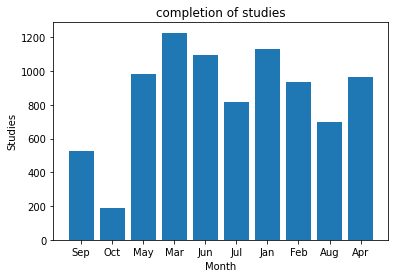

In [0]:
import matplotlib.pyplot as plot
display1=list(display)
display2=list(display.values())
plot.bar(display1,display2)
plot.title('completion of studies')
plot.xlabel('Month')
plot.ylabel('Studies')
plot.show()